## lab2
## task

- Осуществить моделирование n = 1000 реализаций СВ из заданных дискретных распределений.
- Вывести на экран несмещенные оценки математического ожидания и дисперсии, сравнить их с истинными значениями.
- Для каждой из случайных величин построить свой χ^2-критерием Пирсона с уровнем значимость ε=0.05. Проверить, что вероятность ошибки I рода стремится к 0.05.
- Осуществить проверку каждой из сгенерированных выборок каждым из построенных критериев.

https://ru.wikipedia.org/wiki/%D0%93%D0%B8%D0%BF%D0%B5%D1%80%D0%B3%D0%B5%D0%BE%D0%BC%D0%B5%D1%82%D1%80%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5

In [1]:
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd


kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)

def draw(real,theory):
    plt.figure(figsize=(5,3))
    
    plt.hist(x=real, label='real', bins=100  , color='blue',alpha=0.4, rwidth=2)
    x = [elem*tryings for elem in theory]
    plt.plot(x,label='theory', color='pink',alpha=0.99,  linewidth=5, markersize=12)
    plt.xlabel('x', fontsize=10)
    plt.ylabel('frequency', fontsize=10)
    plt.text(2, 4, r'...')
    plt.legend()
    plt.show()

## Теоритеческое распределение

In [3]:
def C_(n, k):
    return factorial(n) / (factorial(k) * factorial(n - k))

def hyper_geom_distribution(D, N, n, k):
    return C_(D, k) * C_(N - D, n - k) / C_(N, n)


def hyper_geom_list(D, N, n):
    p = [hyper_geom_distribution(D, N, n, i) for i in range(max(0, D + n - N), min(n, D))]

    keys = [elem for elem in range(max(0, D + n - N), min(n, D))]

    return dict(zip(keys,p))

## Несмещенные оценки

In [4]:
def bias_mean(x):
    return sum(x)/len(x)
    
def bias_var(x):
    bias_m = bias_mean(x)
    sum_=0
    for elem in x:
        sum_ += (elem - bias_m )**2
    return sum_/ (len(x)-1)


## Генерация с random

In [5]:
from random import random
from math import exp, factorial

def bernoulli(p):
    boundary = 1-p
    return random() > boundary


def hyper_geom(k,N, n):
    # N всего
    # n вытянутых
    # k белых   
    # sum_ количество вытянутых белых шаров
    sum_ = 0
    p = k/N

    for i in range(1, n+1):
        y = bernoulli(p)
        if y :
            sum_ += 1
            if sum_ == k:
                return sum_
        p = (k - sum_) /(N - i)

    return sum_


## Генерация с mcg

In [6]:
from math import exp, factorial

from lab1.generators import mcg


N_uniform = 500000
K = 64
M = 2 ** 31 - 1
C = 1231
alpha0 = beta = 16807.0


In [14]:
#uniform = mcg(alpha0, beta, M, N_uniform, C)

def bernoulli(p):
    q = 1 - p
    x =random() > q
    return x

    
def get_next_hyper_geom(D, N, n):
    """
    D - white balls
    N - total num of balls
    n - drawn
    """
    sum_ = 0
    p = D / N

    for i in range(1, n + 1):
        y = bernoulli(p)
        if y:
            sum_ += 1
            if sum_ == D:
                return sum_
        p = (D - sum_) / (N - i)

    return sum_


def HG(D, N, n, observed):
    """
    Hypergeometric binomial distribution
    """

    for i in range(observed):
        yield get_next_hyper_geom(D, N, n)
        

### количество экспериментов  500
###  параметры :
- D = 200 # черных шаров
- N = 600 # число всех шаром - и черных и белых
- n = 300 # число вытаскиваний 

In [67]:

def report(D ,N,n,tryings):
    gen_numbers = list(HG(D, N, n, tryings))



    theory_freq = list(hyper_geom_list(D,N,n).values())
    theory_num = [int(elem * tryings) for elem in theory_freq ]
    
    observed_frequences = np.bincount(gen_numbers,minlength = len(theory_freq))
    observed_frequences = [elem for elem in observed_frequences if elem != 0]
    
    hist, bin_edges = np.histogram(gen_numbers, density=True)

    x = max(len(observed_frequences), len(theory_num))
    pylab.bar( range(x), observed_frequences, color = 'r', label = 'observed', alpha = 0.5)
    pylab.bar( range(x), theory_num, color = 'black', label = 'theory', alpha= 0.5)
    pylab.legend()
    pylab.show()


    mean_theory = n*D/N
    var_theory = n*(D/N)*(1-D/N)*(N-n)/(N-1)

    print('mean theory:\t',mean_theory,'\nmean real:\t',bias_mean(gen_numbers),
         '\neps:\t',abs(bias_mean(gen_numbers)-mean_theory),'\n')
    print('var theory:\t',var_theory,'\nvar real:\t',bias_var(gen_numbers),
         '\neps:\t',abs(bias_var(gen_numbers)-var_theory),'\n')
    
    
   # print('chi-sq',stats.chisquare(observed_frequences, theory_num))

In [75]:

def report(D ,N,n,tryings):
    gen_numbers = list(HG(D, N, n, tryings))
    theory_freq = list(hyper_geom_list(D,N,n).values())

    keys = hyper_geom_list(D,N,n).keys()
    
    observed_frequences, bin_edges = np.histogram(gen_numbers, bins = len(keys), density=True)

    x = len(observed_frequences)
    pylab.bar( range(x), observed_frequences, color = 'r', label = 'observed', alpha = 0.5)
    pylab.bar( range(x), theory_freq, color = 'black', label = 'theory', alpha= 0.5)
    pylab.legend()
    pylab.show()


    mean_theory = n*D/N
    var_theory = n*(D/N)*(1-D/N)*(N-n)/(N-1)

    print('mean theory:\t',mean_theory,'\nmean real:\t',bias_mean(gen_numbers),
         '\neps:\t',abs(bias_mean(gen_numbers)-mean_theory),'\n')
    print('var theory:\t',var_theory,'\nvar real:\t',bias_var(gen_numbers),
         '\neps:\t',abs(bias_var(gen_numbers)-var_theory),'\n')
    
    
   # print('chi-sq',stats.chisquare(observed_frequences, theory_num))

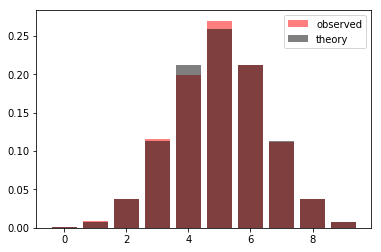

mean theory:	 5.0 
mean real:	 4.9948 
eps:	 0.0052000000000003155 

var theory:	 2.272727272727273 
var real:	 2.294031766353273 
eps:	 0.021304493626000287 



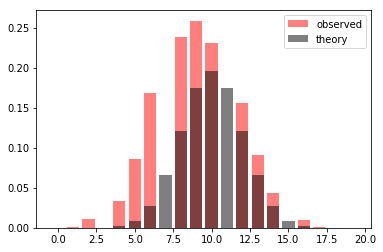

mean theory:	 10.0 
mean real:	 10.0102 
eps:	 0.01019999999999932 

var theory:	 4.040404040404041 
var real:	 3.9272814162832823 
eps:	 0.11312262412075835 



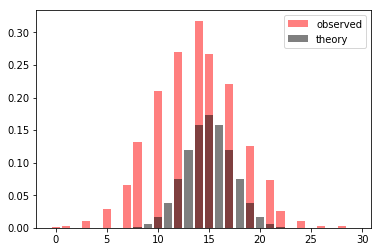

mean theory:	 15.0 
mean real:	 15.0128 
eps:	 0.012800000000000367 

var theory:	 5.303030303030303 
var real:	 5.282092578515808 
eps:	 0.020937724514494604 



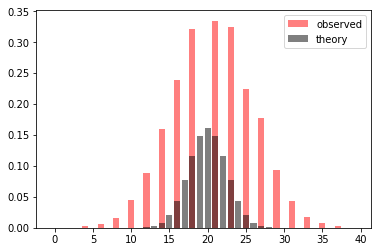

mean theory:	 20.0 
mean real:	 20.0266 
eps:	 0.026599999999998403 

var theory:	 6.0606060606060606 
var real:	 6.138720184036834 
eps:	 0.0781141234307734 



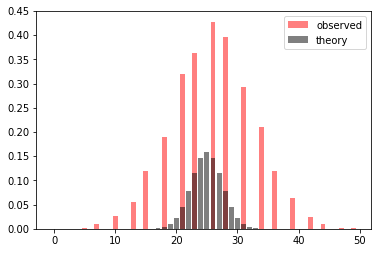

mean theory:	 25.0 
mean real:	 25.022 
eps:	 0.021999999999998465 

var theory:	 6.313131313131313 
var real:	 6.392794558911619 
eps:	 0.07966324578030548 



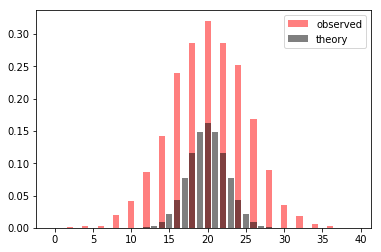

mean theory:	 30.0 
mean real:	 30.0396 
eps:	 0.03960000000000008 

var theory:	 6.0606060606060606 
var real:	 6.121256091218486 
eps:	 0.060650030612425354 



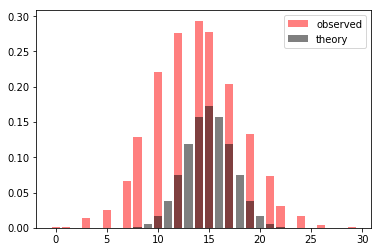

mean theory:	 35.0 
mean real:	 35.0418 
eps:	 0.04180000000000206 

var theory:	 5.303030303030303 
var real:	 5.483149389878028 
eps:	 0.18011908684772493 



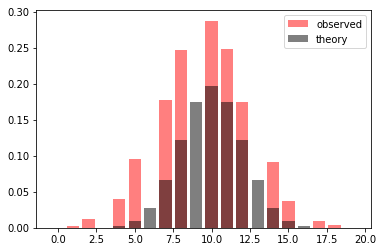

mean theory:	 40.0 
mean real:	 39.978 
eps:	 0.021999999999998465 

var theory:	 4.040404040404041 
var real:	 3.9423044608921622 
eps:	 0.09809957951187842 



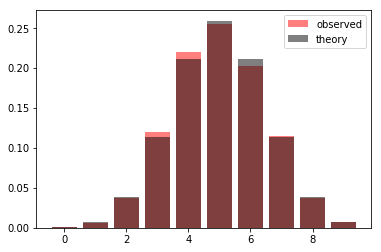

mean theory:	 45.0 
mean real:	 44.9796 
eps:	 0.020400000000002194 

var theory:	 2.272727272727273 
var real:	 2.257235287057464 
eps:	 0.015491985669808805 



In [90]:
for i in range(10,100,10):
    print('количество вытягиваний'б i)
    report(D = 50 ,N = 100,n = i, tryings = 5000)

In [12]:
from lab1.graph import draw_autocorr,draw_cdf,draw_freq,draw_intervals,draw_scatter

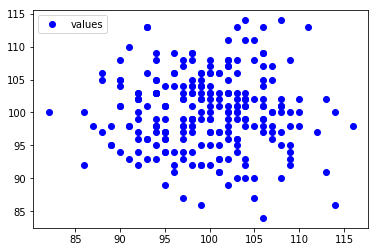

In [13]:
x_1 = [gen_numbers[i] for i in range(tryings) if i%2 == 1]
x_2 = [gen_numbers[i] for i in range(tryings) if i%2 == 0]
draw_scatter(x_1,x_2)



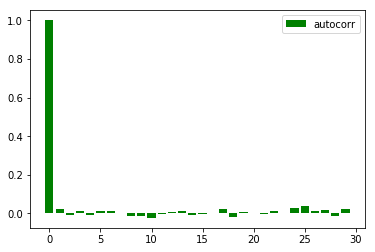

In [27]:
def autocorr(x, t=1):
    for i in range(0,t):
        y = x + [0]*i
        y = [ y[j+i] for j in range(len(x)) ]
        corr = np.corrcoef([x,y])
        yield corr[0][1]

corr = list(autocorr(gen_numbers3,t=30))
draw_autocorr(corr)

## Выводы
1. Автокорреляция :
при размере выборки 100 очень плохие результаты, при N = 5000 корреляция сходиться к нулю.
2.  Точечные оценки : 

        - mean theory:	 3.3333333333333335 
        - mean real:	 3.36 
        - eps:	 0.026666666666666394 

        - var theory:	 1.8832391713747647 
        - var real:	 2.071111111111113 
        - eps:	 0.1878719397363482 

3. Критерий Пирсона выполнен, pvalue=0.5098265071449051

